In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from helper_functions import *

df_untarget = pd.read_csv('resultsFashionMINSTuntarget.csv')
df_target = pd.read_csv('resultsFashionMINSTtarget.csv')
sns.set_theme(style="whitegrid")
palette = sns.color_palette("hls", 6)

# Untargeted attack

## Metrics


* Success Rate by Pixel & Model
* Success Rate by Class Label & Pixel Count
* Confusion matrix
* Average Confidence / Adversarial Probability Labels
* Confidence Difference Boxplots
* Identifyling Outliers


In [3]:
model_names = ["All Convolution", "Network in Network", "LeNet"]
pixel_counts = [1,2,3,4]

model_tables, conf_matrix_set = summary_tables(df_untarget)

## Success Rate by Pixel & Model

In [4]:
get_success_rate_table_by_pixel_count(df_untarget)

c:\Users\Ola\Documents\GitHub\OnePixelAttackFashionMINST\results\helper_functions.py:133: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  success_by_pixel_count = success_by_pixel_count.applymap(lambda x: f"{x:.2f}%")


pixel_count,1,2,3,4
model_name,,,,
All Convolution,8.20%,23.60%,41.40%,55.20%
LeNet,12.20%,32.40%,49.00%,56.00%
Network in Network,6.00%,22.00%,37.60%,48.80%


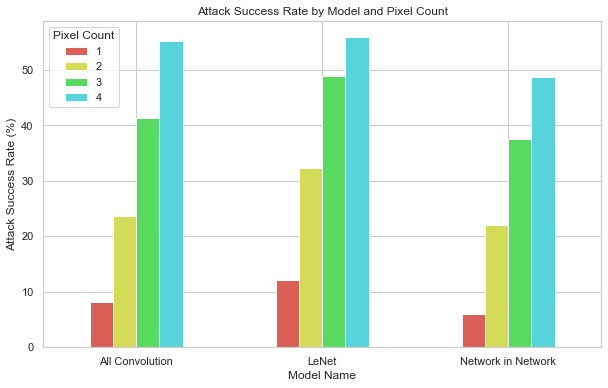

In [5]:
plot_success_rate_by_pixel_count(df_untarget)


## Success Rate by Class Label & Pixel Count

In [6]:
model_tables["All Convolution"]

,1 Pixel,2 Pixel,3 Pixel,4 Pixel
actual_class,,,,
0,14.00%,28.00%,46.00%,72.00%
1,2.00%,8.00%,22.00%,36.00%
2,16.00%,60.00%,86.00%,96.00%
3,10.00%,24.00%,46.00%,66.00%
4,14.00%,32.00%,62.00%,78.00%
5,4.00%,8.00%,14.00%,14.00%
6,20.00%,48.00%,72.00%,74.00%
7,2.00%,20.00%,36.00%,64.00%
8,0.00%,0.00%,4.00%,2.00%


In [7]:
model_tables["Network in Network"]

,1 Pixel,2 Pixel,3 Pixel,4 Pixel
actual_class,,,,
0,6.00%,36.00%,52.00%,72.00%
1,2.00%,4.00%,6.00%,12.00%
2,16.00%,46.00%,74.00%,88.00%
3,2.00%,14.00%,28.00%,32.00%
4,18.00%,34.00%,48.00%,64.00%
5,2.00%,6.00%,8.00%,14.00%
6,10.00%,30.00%,42.00%,52.00%
7,2.00%,42.00%,86.00%,100.00%
8,0.00%,0.00%,4.00%,12.00%


In [8]:
model_tables["LeNet"]

,1 Pixel,2 Pixel,3 Pixel,4 Pixel
actual_class,,,,
0,20.00%,50.00%,70.00%,76.00%
1,4.00%,4.00%,8.00%,20.00%
2,28.00%,68.00%,82.00%,88.00%
3,2.00%,12.00%,30.00%,32.00%
4,22.00%,38.00%,60.00%,68.00%
5,8.00%,18.00%,34.00%,42.00%
6,18.00%,30.00%,50.00%,54.00%
7,20.00%,70.00%,94.00%,100.00%
8,0.00%,6.00%,8.00%,12.00%


c:\Users\Ola\Documents\GitHub\OnePixelAttackFashionMINST\results\helper_functions.py:81: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  model_data = df.applymap(lambda x: float(x.strip('%')))


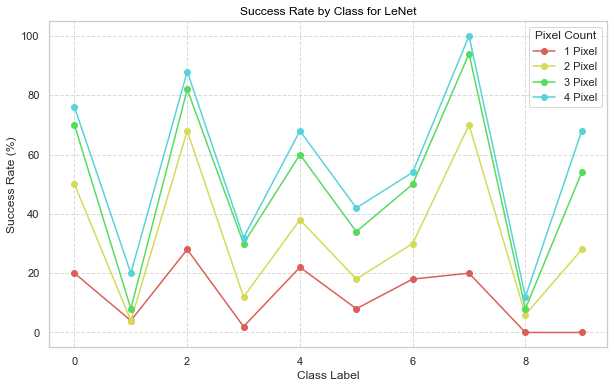

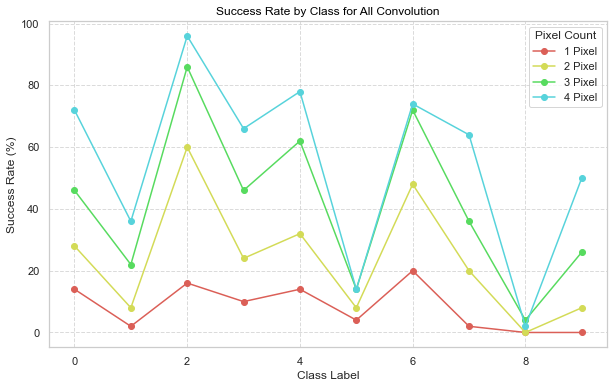

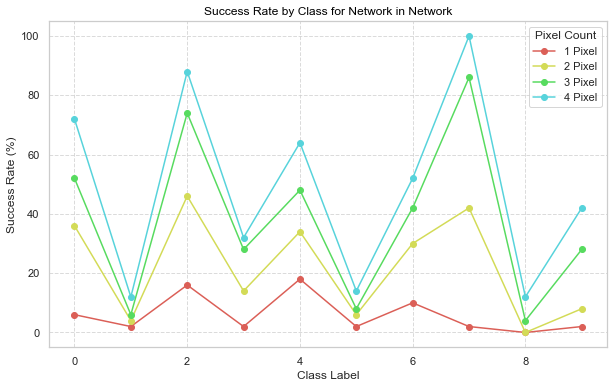

In [9]:
plot_success_rate_by_class(model_tables)

## Confusion matrices

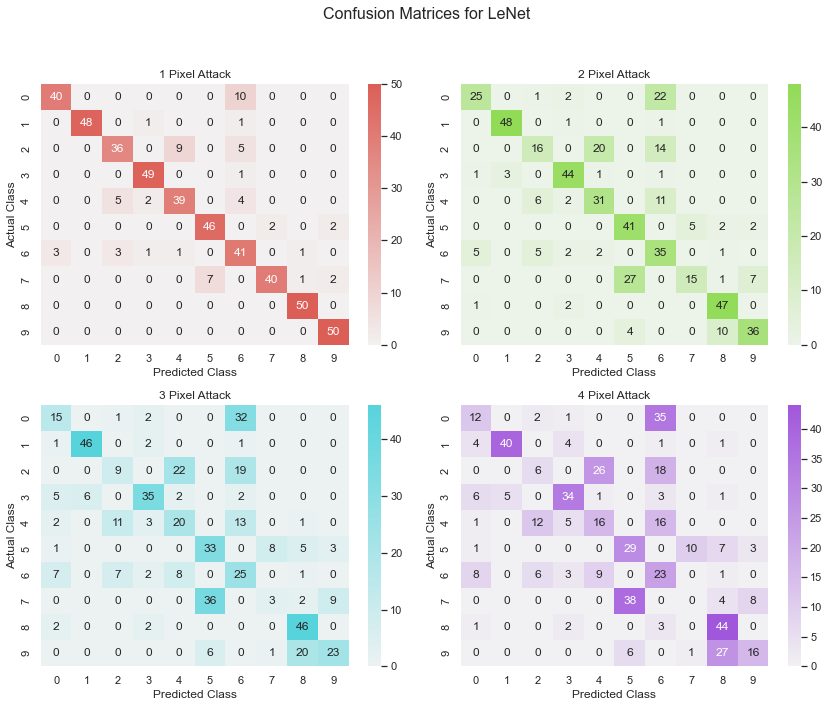

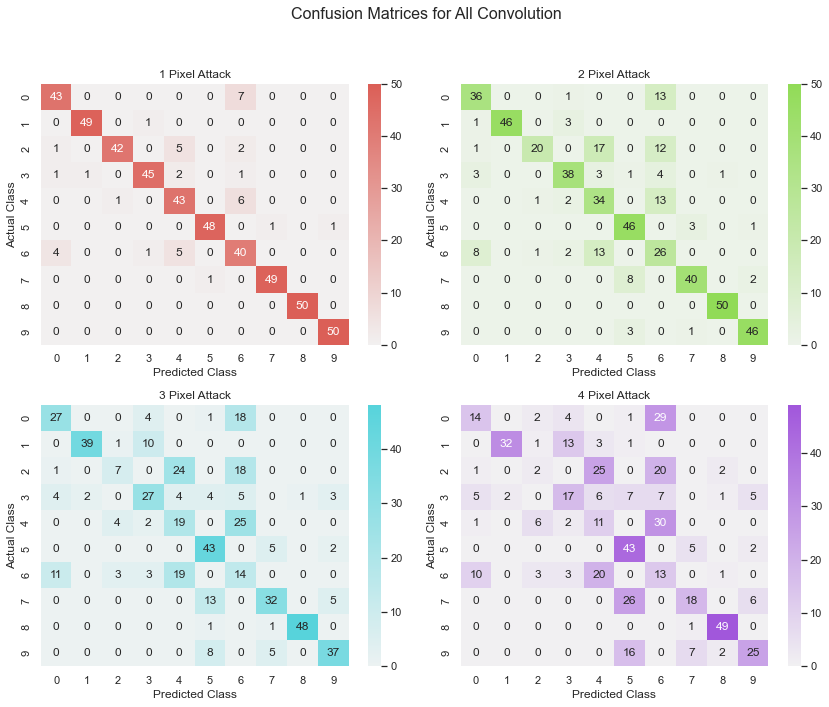

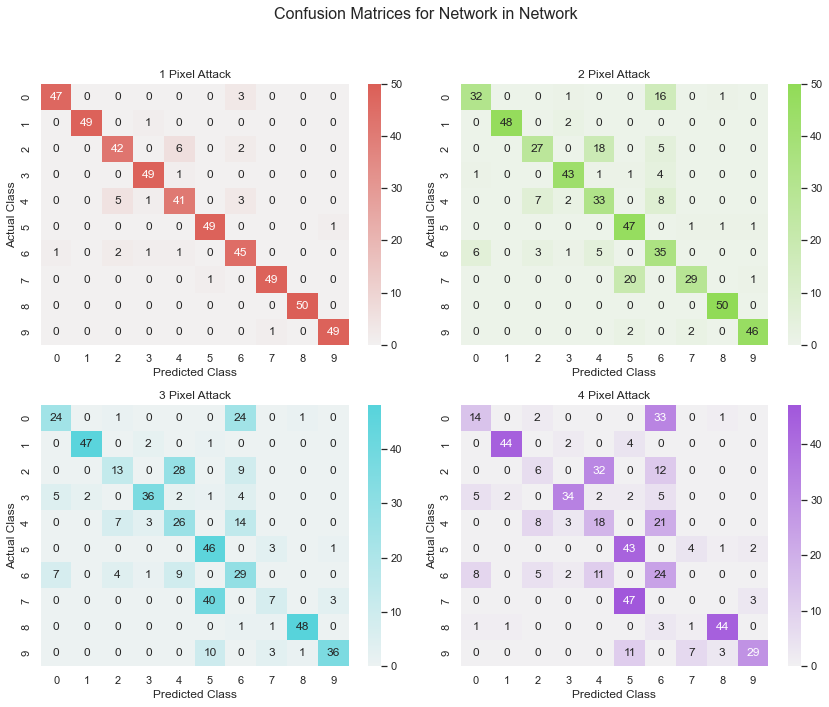

In [10]:
plot_confusion_matrices_by_model(model_tables, conf_matrix_set, pixel_counts=pixel_counts)

## Average Confidence / Adversarial Probability Labels

In [11]:
# Apply the conversion to the 'predicted_probs' column in the dataframe
df_untarget['predicted_probs'] = df_untarget['predicted_probs'].apply(convert_to_array)
df_untarget['pred_conf'] = df_untarget.apply(get_pred_conf, axis=1)
calculate_confidence_means(df_untarget)

pixel_count,1,2,3,4
model_name,,,,
All Convolution,57.97%,56.9%,55.38%,54.74%
LeNet,59.48%,57.31%,57.87%,58.13%
Network in Network,61.54%,55.16%,55.52%,55.84%


## Confidence Difference Boxplots



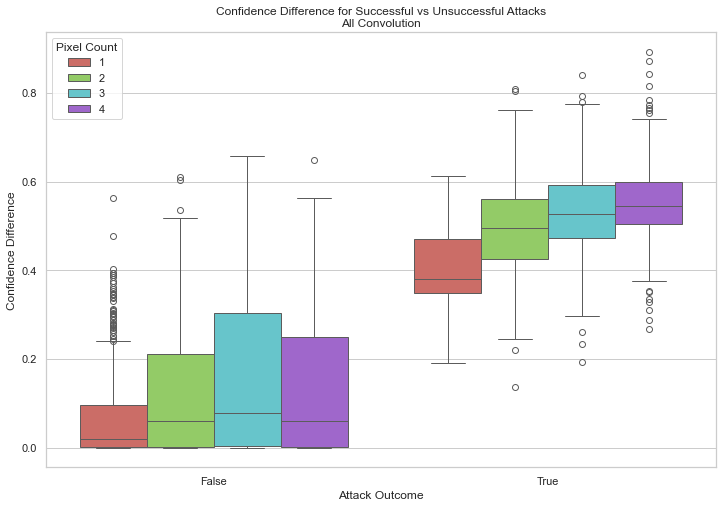

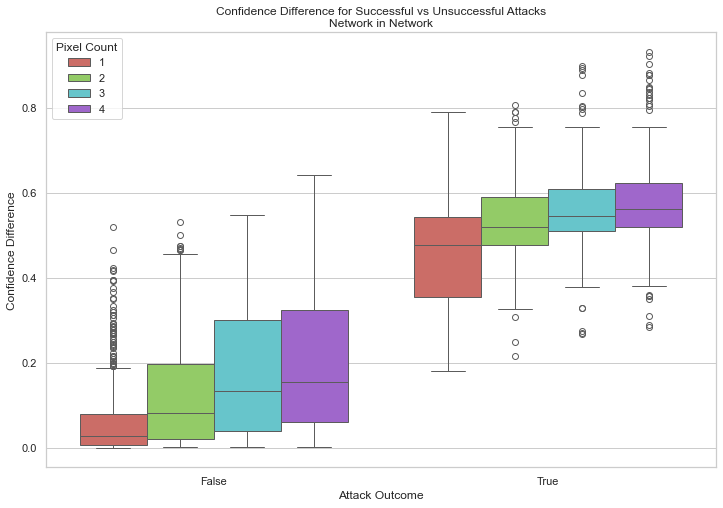

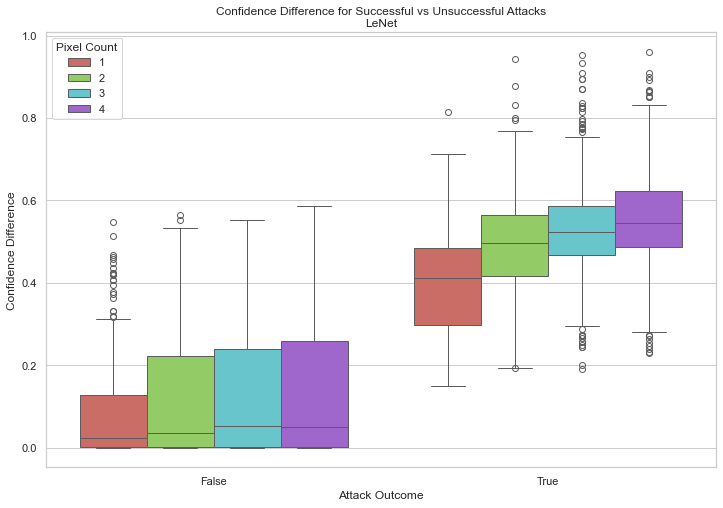

In [12]:
for model in model_names:
  confidence_diff_boxplot(df_untarget, model_names=[model], pixel_counts=pixel_counts)

## Identifyling Outliers

In [13]:
outliers_AllConv_untarget = identify_outliers(df_untarget, model_names=['All Convolution'], pixel_counts=pixel_counts)
outliers_Nin_untarget = identify_outliers(df_untarget, model_names=['Network in Network'], pixel_counts=pixel_counts)
outliers_LeNet_untarget = identify_outliers(df_untarget, model_names=['LeNet'], pixel_counts=pixel_counts)
outliers_df_untarget = pd.concat([outliers_AllConv_untarget, outliers_Nin_untarget, outliers_LeNet_untarget], axis=0, ignore_index=True)

c:\Users\Ola\Documents\GitHub\OnePixelAttackFashionMINST\results\helper_functions.py:232: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x=outliers_by_model.index, y=outliers_by_model.values, palette=palette)
c:\Users\Ola\Documents\GitHub\OnePixelAttackFashionMINST\results\helper_functions.py:232: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.barplot(ax=axes[0], x=outliers_by_model.index, y=outliers_by_model.values, palette=palette)
c:\Users\Ola\Documents\GitHub\OnePixelAttackFashionMINST\results\helper_functions.py:248: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=outliers_by_pixel.index, y=outliers_by_pixel.v

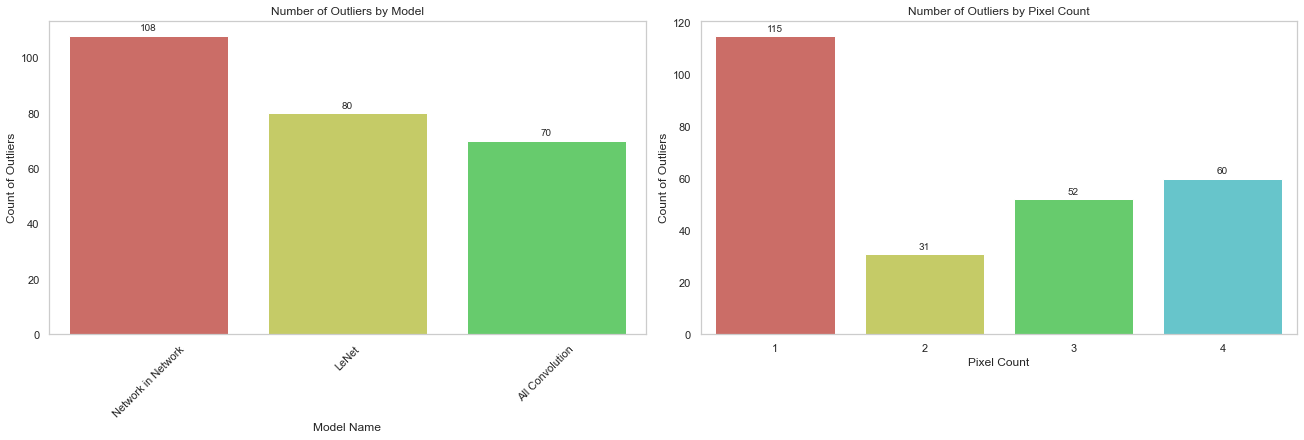

In [14]:
plot_outliers(outliers_df_untarget)

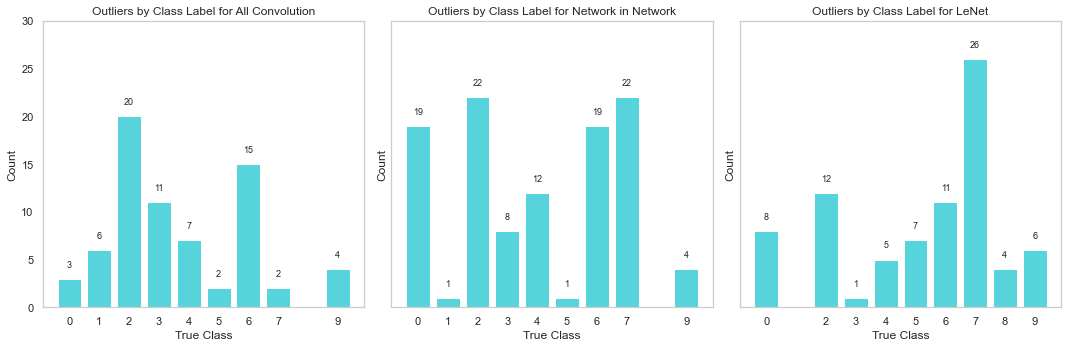

In [34]:
outliers_by_class_label(outliers_df_untarget)

# Targeted attack

## Targeted Success Rate by Pixel & model

In [16]:
success_table = get_targeted_success_rate_table_by_pixel_count(df_target)
success_table

c:\Users\Ola\Documents\GitHub\OnePixelAttackFashionMINST\results\helper_functions.py:383: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  success_by_pixel_count = success_by_pixel_count.applymap(lambda x: f"{x:.2f}%")


pixel_count,1,2,3,4
model_name,,,,
All Convolution,1.22%,4.56%,7.22%,9.33%
LeNet,2.67%,6.11%,9.11%,11.78%
Network in Network,1.33%,3.67%,6.00%,8.33%


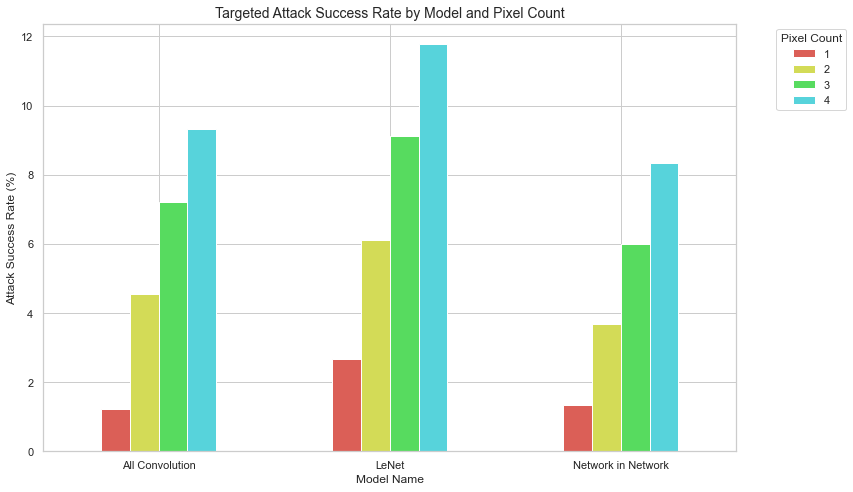

In [17]:
plot_targeted_success_rate_by_pixel_count(success_table)

## Untargeted Success Rate by Pixel & model

* average number of images successfully attacked at least once

In [18]:
broad_targeting_success_rate(df_target)

pixel_count,1,2,3,4
model_name,,,,
All Convolution,10.0%,30.0%,45.0%,55.0%
LeNet,21.0%,38.0%,52.0%,59.0%
Network in Network,11.0%,29.0%,43.0%,52.0%


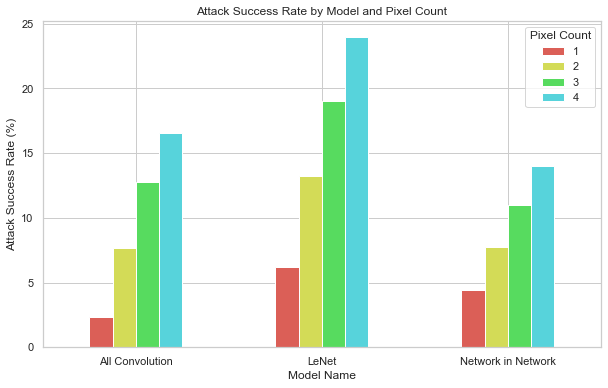

In [19]:
plot_success_rate_by_pixel_count(df_target)

In [20]:
# Initialize dictionaries for results
model_tables_target , conf_matrix_set_target = summary_tables(df_target, targeted = True)

## Success Rate by Class Label & Pixel Count

In [21]:
model_tables_target["All Convolution"]

,1 Pixel,2 Pixel,3 Pixel,4 Pixel
actual_class,,,,
0,2.22%,5.56%,6.67%,8.89%
1,0.00%,0.00%,0.00%,2.22%
2,4.44%,12.22%,17.78%,22.22%
3,1.11%,4.44%,7.78%,10.00%
4,2.22%,4.44%,8.89%,13.33%
5,0.00%,2.22%,3.33%,2.22%
6,2.22%,6.67%,10.00%,12.22%
7,0.00%,4.44%,10.00%,11.11%
8,0.00%,0.00%,0.00%,0.00%


In [22]:
model_tables_target["Network in Network"]

,1 Pixel,2 Pixel,3 Pixel,4 Pixel
actual_class,,,,
0,1.11%,3.33%,6.67%,14.44%
1,0.00%,0.00%,0.00%,0.00%
2,2.22%,5.56%,12.22%,15.56%
3,0.00%,2.22%,3.33%,4.44%
4,2.22%,5.56%,6.67%,8.89%
5,1.11%,2.22%,2.22%,3.33%
6,2.22%,4.44%,6.67%,8.89%
7,2.22%,7.78%,10.00%,12.22%
8,0.00%,0.00%,2.22%,2.22%


In [23]:
model_tables_target["LeNet"]

,1 Pixel,2 Pixel,3 Pixel,4 Pixel
actual_class,,,,
0,3.33%,8.89%,12.22%,15.56%
1,0.00%,0.00%,0.00%,1.11%
2,8.89%,15.56%,18.89%,20.00%
3,1.11%,5.56%,7.78%,11.11%
4,4.44%,7.78%,8.89%,12.22%
5,1.11%,3.33%,7.78%,12.22%
6,3.33%,6.67%,8.89%,8.89%
7,4.44%,10.00%,16.67%,22.22%
8,0.00%,0.00%,0.00%,0.00%


c:\Users\Ola\Documents\GitHub\OnePixelAttackFashionMINST\results\helper_functions.py:81: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  model_data = df.applymap(lambda x: float(x.strip('%')))


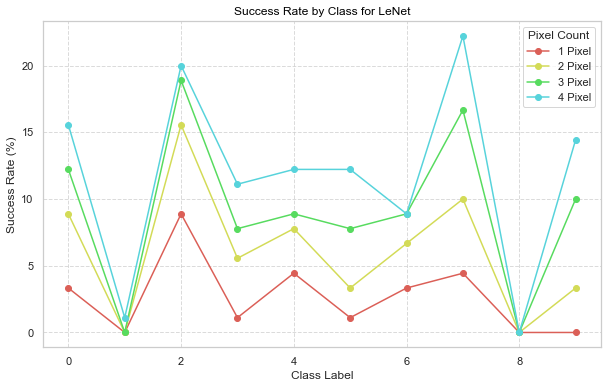

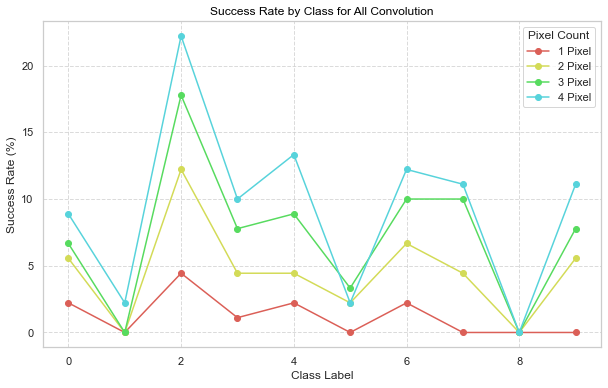

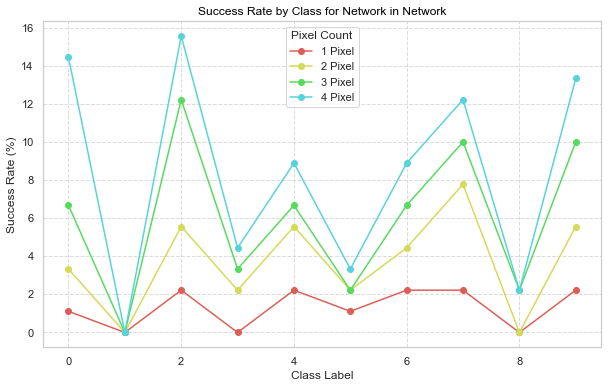

In [24]:
plot_success_rate_by_class(model_tables_target)

## Number of Target Classes

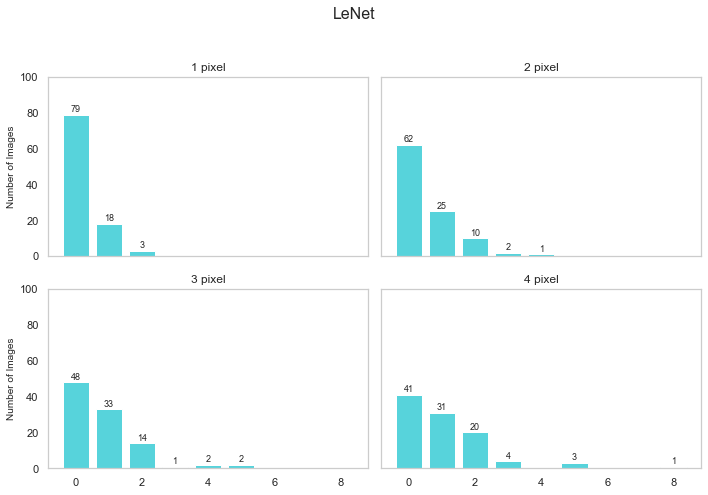

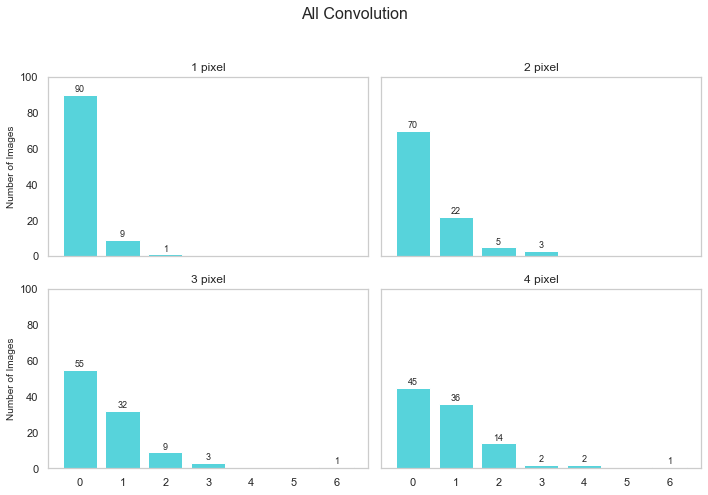

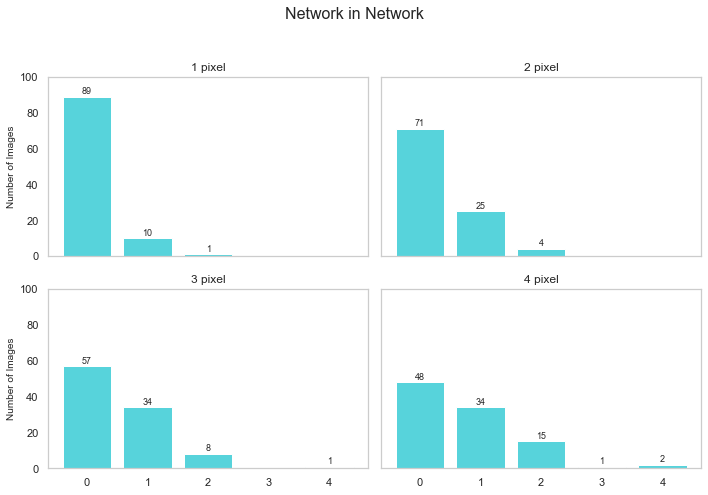

In [25]:
targeted_number_of_target_classes(df_target)

## Confusion Matrices

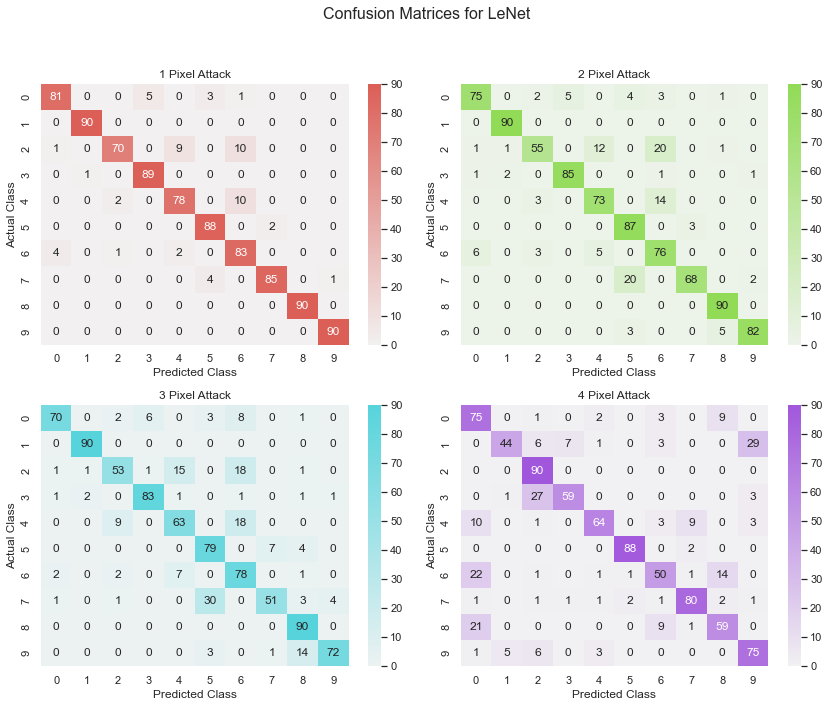

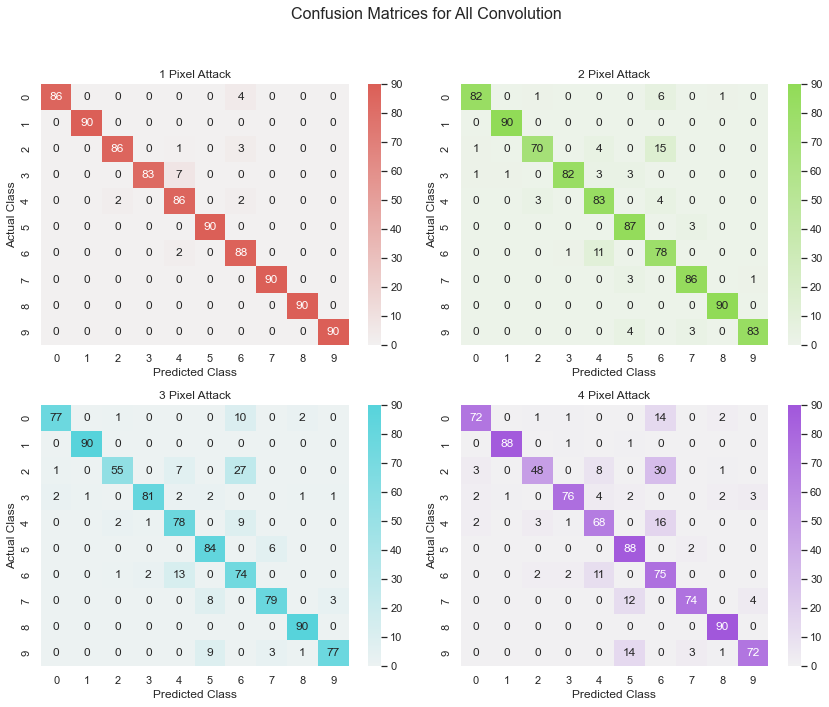

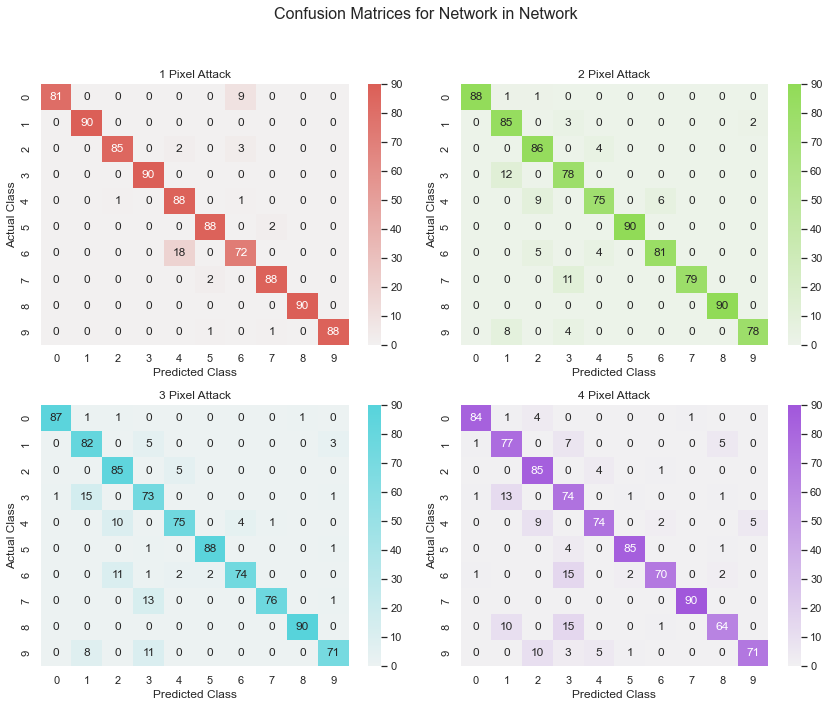

In [26]:
plot_confusion_matrices_by_model(model_tables_target, conf_matrix_set_target, pixel_counts=pixel_counts)

## Average Confidence / Adversarial Probability Labels

In [27]:
# Apply the conversion to the 'predicted_probs' column in the dataframe
df_target['predicted_probs'] = df_target['predicted_probs'].apply(convert_to_array)
df_target['pred_conf'] = df_target.apply(get_pred_conf, axis=1)

calculate_confidence_means(df_target)

pixel_count,1,2,3,4
model_name,,,,
All Convolution,54.38%,51.11%,52.3%,51.5%
LeNet,52.49%,52.94%,55.05%,54.88%
Network in Network,54.24%,51.4%,49.85%,48.91%


## Confidence Difference Boxplots

In [28]:
df_target['confidence_diff'] = abs(df_target['confidence_diff'])

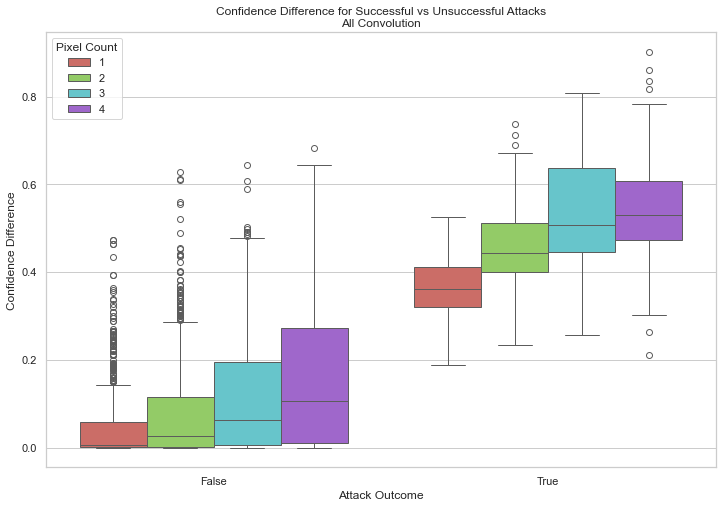

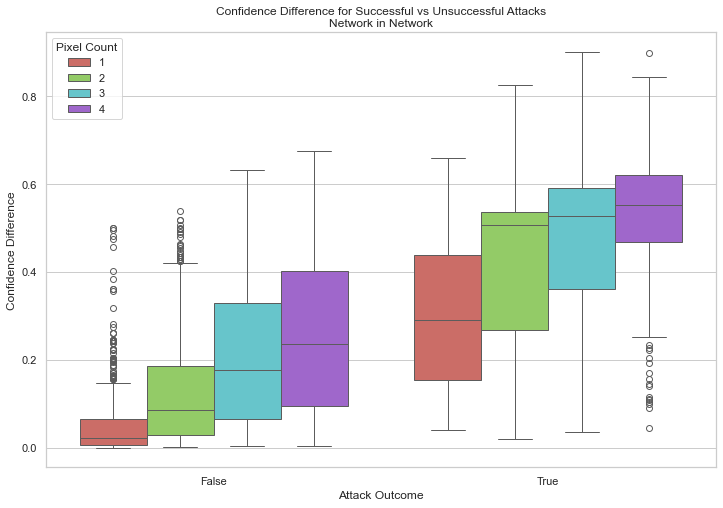

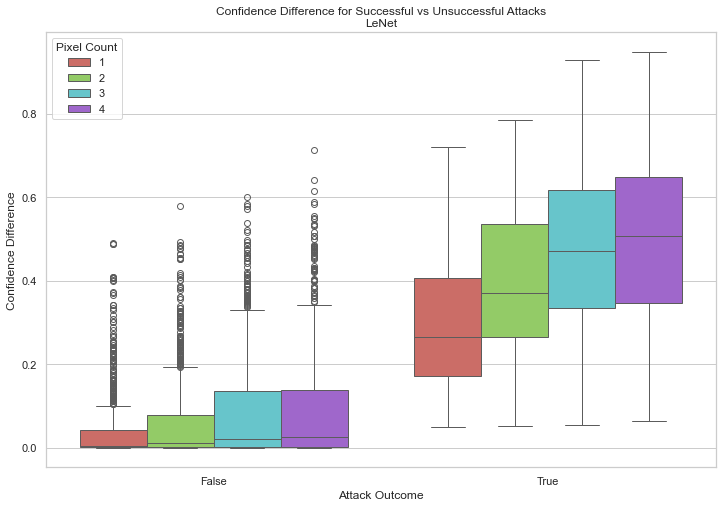

In [29]:
for model in model_names:
  confidence_diff_boxplot(df_target, model_names=[model], pixel_counts=pixel_counts)

## Identifying Outliers

c:\Users\Ola\Documents\GitHub\OnePixelAttackFashionMINST\results\helper_functions.py:232: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x=outliers_by_model.index, y=outliers_by_model.values, palette=palette)
c:\Users\Ola\Documents\GitHub\OnePixelAttackFashionMINST\results\helper_functions.py:232: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.barplot(ax=axes[0], x=outliers_by_model.index, y=outliers_by_model.values, palette=palette)
c:\Users\Ola\Documents\GitHub\OnePixelAttackFashionMINST\results\helper_functions.py:248: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=outliers_by_pixel.index, y=outliers_by_pixel.v

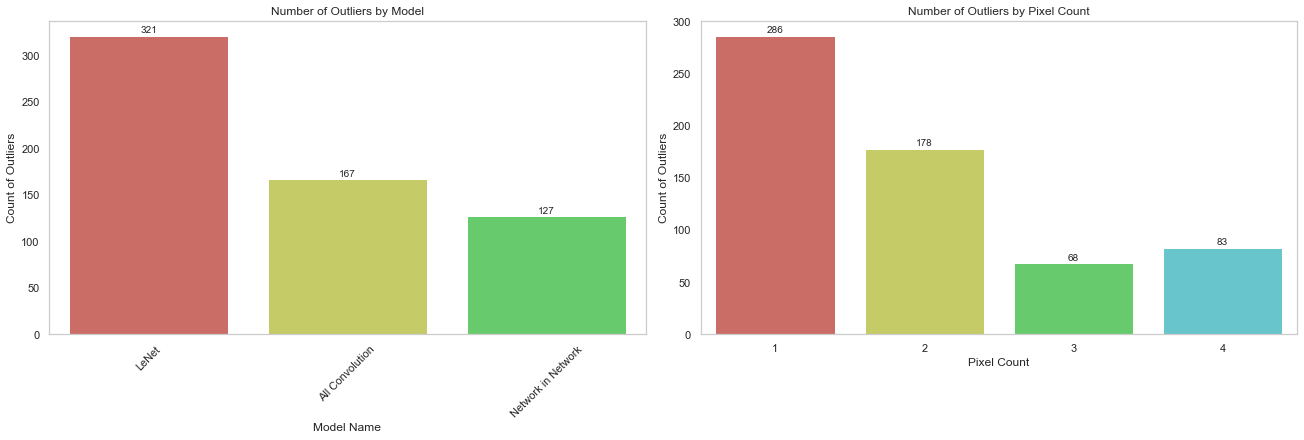

In [30]:
outliers_AllConv_target = identify_outliers(df_target, model_names=['All Convolution'], pixel_counts=pixel_counts)
outliers_Nin_target = identify_outliers(df_target, model_names=['Network in Network'], pixel_counts=pixel_counts)
outliers_LeNet_target = identify_outliers(df_target, model_names=['LeNet'], pixel_counts=pixel_counts)
outliers_df_target = pd.concat([outliers_AllConv_target, outliers_Nin_target, outliers_LeNet_target], axis=0, ignore_index=True)

plot_outliers(outliers_df_target)

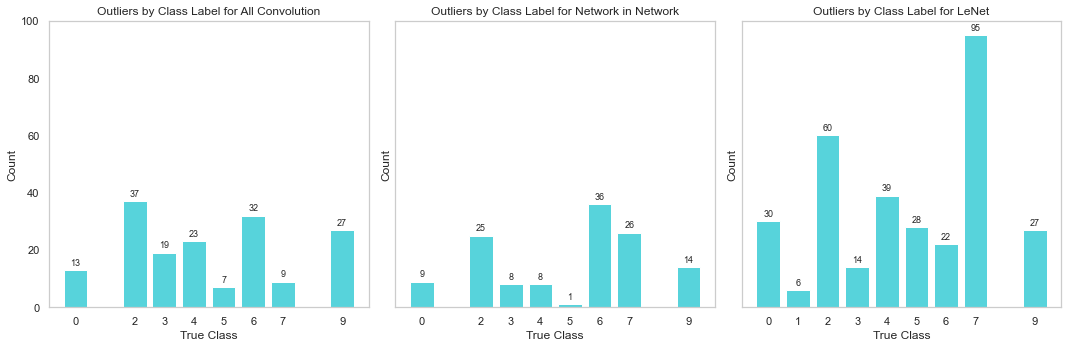

In [32]:
outliers_by_class_label(outliers_df_target)